In [203]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce
import seaborn as sns

In [204]:
lc_u = np.load('uid_per_shb_fatigue(1).npy')

In [205]:
path = os.getcwd()+'/user_epoch/'
#path = os.getcwd()+'/extcoh/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

df_lcu = []
demo_info = []
uid = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    #for var in ['sleep', 'hr', 'steps']:
    #    if var not in df.columns:
    #        df[var] = np.nan
    df_lcu.append(df)
    demo_info.append(f.split("/")[-1].split('.')[0])
    uid.append(int(f.split("/")[-1].split('.')[1][1:])) 
      
sex = [re.split('(\d+)',demo_info[i])[0] for i in range(len(demo_info))]
age = [int(re.split('(\d+)',demo_info[i])[1]) for i in range(len(demo_info))] 

In [206]:
# get starting and end times of hourly bins
bin_s = []
for h in range(24):
    for m in range(4):    
        time_string_s = '%02d:%02d:%02d' % (h,m * 15,0) 
        bin_s.append(time_string_s) 

In [207]:
# ages = np.where(np.array(age) == 45)[0]
# dfs = []
# for i in ages:
#     s = sex[i]
#     a = str(age[i])
#     u = str(uid[i])
#     nam = s+a+'.0'+u
#     dfs.append(pd.read_csv(path+nam+'.csv', index_col = 0))

## functions

In [208]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days
def get_ov(subd, bins):
    #subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd) > 0:
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&(subd['steps'].notna())]['hr'].dropna()
        n_d, _ = np.histogram(day, bins=bins)
        n_n, _ = np.histogram(night, bins=bins)
        d = n_d/len(day)
        n = n_n/len(night)
        #if np.isnan(np.sum(np.minimum(n,d))):
        #    ov = 0
        if len(day) >= 100 and len(night) >= 100:
            ov = np.sum(np.minimum(n,d))#np.round(np.sum(np.minimum(n,d)),2)
        else:
            ov = -1
    else:
        ov = -1
        day = [0]
        night = [0]
    return ov,len(day), len(night)

## simple timeseries

In [209]:
check_u = np.array([ 601007, 1217724, 1225571,  468824, 1232956,  146789,  198054,
        297815,  278688, 1220358,  120014, 1208175, 1225369,  865661,
       1116909,  203461, 1116926, 1245237,  827739,  357322, 1091037,
          8703,  494935, 1234389,  660061, 1148848,  859881, 1228834,
         83696, 1217773, 1110229, 1075521,  200221,  789093, 1227939,
        128235,  713054,  288844])

In [505]:
lid = np.where(np.array(uid) == 200221)[0][0]

In [506]:
age[lid]

65

In [507]:
sex[lid]

'female'

In [508]:
n = lid
df = df_lcu[n].copy()#dfs[0].copy()
df['start'] = pd.to_datetime(df['start'])

In [509]:
userid = uid[n]

In [510]:
userid

200221

In [511]:
# fig, ax = plt.subplots(1,2, figsize=(13,7
#                                     ),sharex=True,sharey=True)
 
# for ph in [0,1,2,3]:

#     dfph = df[df['phase'] == ph]
#     dfph_we = dfph[dfph['weekend'] == True]
#     dfph_wd = dfph[dfph['weekend'] == False]
#     ax[0].errorbar(range(96), dfph_we.groupby([dfph_we.start.dt.hour, dfph_we.start.dt.minute]).mean()['% of MHR'], yerr=0)
#     ax[1].errorbar(range(96), dfph_wd.groupby([dfph_wd.start.dt.hour, dfph_wd.start.dt.minute]).mean()['% of MHR'], yerr=0)
#     ax[0].set_ylabel('heart rate rel to max hr [%] weekend')
#     ax[1].set_ylabel('heart rate rel to max hr [%] week')
#     ax[1].set_xlabel('time bins')
#     ax[0].set_xlabel('time bins')
#     ax[1].set_xticks(range(len(bin_s))[::8], labels= bin_s[::8],rotation=60)
#     ax[0].set_xticks(range(len(bin_s))[::8], labels= bin_s[::8],rotation=60)

# plt.legend(['pre', 'acute', 'sub-acute', 'post']);

In [512]:
# fig, ax = plt.subplots(1,2, figsize=(13,7
#                                     ),sharex=True,sharey=True)
 
# for ph in [0,1,2,3]:

#     dfph = df[df['phase'] == ph]
#     dfph_we = dfph[dfph['weekend'] == True]
#     dfph_wd = dfph[dfph['weekend'] == False]
#     ax[0].errorbar(range(96), dfph_we.groupby([dfph_we.start.dt.hour, dfph_we.start.dt.minute]).mean()['steps'], yerr=0)
#     ax[1].errorbar(range(96), dfph_wd.groupby([dfph_wd.start.dt.hour, dfph_wd.start.dt.minute]).mean()['steps'], yerr=0)
#     ax[0].set_ylabel('steps weekend')
#     ax[1].set_ylabel('steps week')
#     ax[1].set_xlabel('time bins')
#     ax[0].set_xlabel('time bins')
#     ax[1].set_xticks(range(len(bin_s))[::8], labels= bin_s[::8],rotation=60)
#     ax[0].set_xticks(range(len(bin_s))[::8], labels= bin_s[::8],rotation=60)

# plt.legend(['pre', 'acute', 'sub-acute', 'post']);

In [513]:
# plt.figure(figsize=(8,4
#                    ))
 
# w = -5
# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['steps'].values)
# #plt.xticks(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['Time Bin 1'],rotation
# #           =90);
# w = 0
# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['steps'].values)
# #plt.xticks(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['Time Bin 1'],rotation
# #           =90);

# w = 5
# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['steps'].values)
# #plt.xticks(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['Time Bin 1'],rotation
# #           =90);
# plt.ylabel('steps')
# plt.xticks(np.linspace(50,600,7),['M', 'T', 'W', 'T', 'F', 'S', 'S'])
# plt.legend(['-10 weeks to test', '0 weeks to test', '10 weeks to test']);

In [514]:
# plt.figure(figsize=(8,4))
 
# w = -10
# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['hr'].values)
 
# w = 0
# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['hr'].values)
 

# w = 10

# plt.plot(range(len(df[df['week_totest']==w])),df[df['week_totest']==w]['hr'].values)
 

# plt.legend(['-10 w', '0 w', '10 w']);

## hr rhr overlap 

In [515]:
df['dt'] = pd.to_datetime(df['dt'])
df['date'] = pd.to_datetime(df['date'])
mis_row = []
for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
    mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])

In [516]:
if len(mis_row) > 0:
    df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))

In [517]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [518]:
df['start'] = pd.to_datetime(df['start']) 

In [519]:
binwidth = 40

bins=np.linspace(df['hr'].min(), df['hr'].max() + (binwidth/2), binwidth)
wi_list = sliding_window(df['date'].unique(),7)
ovs = []
day_d = []
night_d = []
rhr_d = []
for wi in wi_list:
    over, d, n = get_ov(df[df['date'].isin(wi)], bins)
    rhr_d.append(len(df[df['date'].isin(wi)][df[df['date'].isin(wi)]['rhr'].notna()]))
    ovs.append(over)
    day_d.append(d)
    night_d.append(n)

/tmp/ipykernel_102035/1057239377.py:17: RuntimeWarning: invalid value encountered in divide
  d = n_d/len(day)
/tmp/ipykernel_102035/1057239377.py:18: RuntimeWarning: invalid value encountered in divide
  n = n_n/len(night)


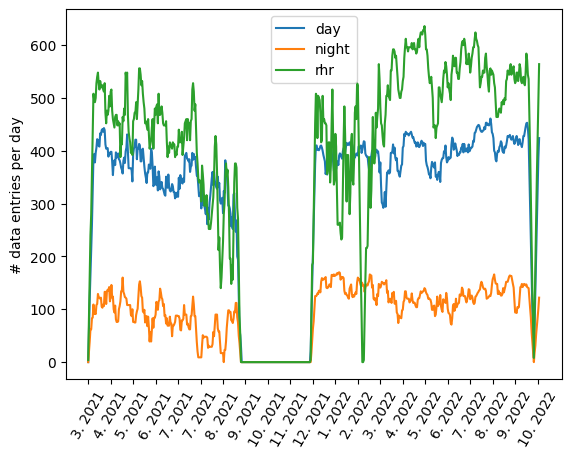

In [520]:
plt.plot(range(len(day_d)), day_d)
plt.plot(range(len(night_d)), night_d)
plt.plot(range(len(rhr_d)), rhr_d)
plt.xticks(range(len(ovs))[::30],labels = [str(pd.to_datetime(w[0]).month)+'. '+str(pd.to_datetime(w[0]).year) for w in wi_list][::30],rotation=60);
plt.ylabel('# data entries per day')
plt.legend(['day', 'night', 'rhr']);

In [521]:
# plt.scatter(range(len(ovs)),ovs,s=5)
dd = df.groupby('date').sum()

# plt.axvline(x=np.where(dd.index == df['dt'].iloc[0])[0] ,color='r')
# plt.xticks(range(len(ovs))[::30],labels = [str(pd.to_datetime(w[0]).month)+'. '+str(pd.to_datetime(w[0]).year) for w in wi_list][::30],rotation=60)
# plt.xlabel('days')
# #plt.xlim(350,880)
# plt.ylabel('overlap hr and rhr');

### w mean

In [522]:
def get_md(subd):
    #subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd) > 0:
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr_cl'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna()&(subd['steps']!=0)))]['hr_cl'].dropna()
        dayr = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].isna()|(subd['steps']==0)))]['hr_cl'].dropna()
        rhr = subd['rhr_cl'].dropna()
        if len(day) >= 40 and len(night) >= 10:
            return night.mean(), night.std()/np.sqrt(len(night)), day.mean(), day.std()/np.sqrt(len(day)), rhr.mean(),rhr.std()/np.sqrt(len(rhr)), dayr.mean(), dayr.std()/np.sqrt(len(dayr))
        else:
            return 0,0,0,0,0,0,0,0
    else:
        return 0,0,0,0,0,0,0,0

In [523]:
seas = pd.read_csv('mean_rhr_pdps.csv',index_col=0)

In [524]:
sc = df.source[df.source.notna()].iloc[0]
seas_sc = seas[seas.source == sc].copy()
seas_sc['date'] = pd.to_datetime(seas_sc['date'])
#df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]

In [525]:
df_seas = pd.merge(df,seas_sc, how = 'inner', on ='date')

In [526]:
df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']

In [527]:
wi_list = sliding_window(df['date'].unique(),7)
night_mean = []
day_mean = []
night_std = []
day_std = []
rhr_mean = []
rhr_std = []
dayr_mean = []
dayr_std = []
for wi in wi_list:
    nm, ns, dm, ds, rh, rhs, drm, drs = get_md(df_seas[df_seas['date'].isin(wi)])
     
    day_mean.append(dm)
    night_mean.append(nm)
    day_std.append(ds)
    night_std.append(ns)
    rhr_mean.append(rh)
    rhr_std.append(rhs)
    dayr_mean.append(drm)
    dayr_std.append(drs)

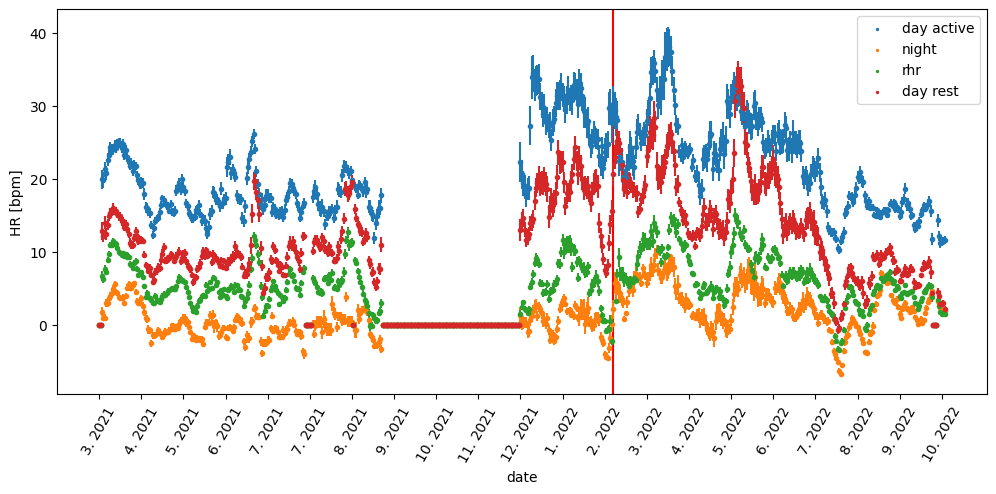

In [528]:
plt.figure(figsize=(12,5))
plt.scatter(range(len(day_mean)),day_mean,s= 2)
plt.scatter(range(len(night_mean)),night_mean, s= 2) 
plt.scatter(range(len(rhr_mean)),rhr_mean, s= 2) 
plt.scatter(range(len(dayr_mean)),rhr_mean, s= 2) 
plt.axvline(x=np.where(dd.index == df['dt'].iloc[0])[0] ,color='r')
plt.errorbar(range(len(day_mean)),day_mean,yerr=day_std, fmt=".")
plt.errorbar(range(len(night_mean)),night_mean,yerr=night_std, fmt=".")
plt.errorbar(range(len(rhr_mean)),rhr_mean,yerr=rhr_std, fmt=".")
plt.errorbar(range(len(dayr_mean)),dayr_mean,yerr=dayr_std, fmt=".")

plt.xticks(range(len(day_mean))[::30],labels = [str(pd.to_datetime(w[0]).month)+'. '+str(pd.to_datetime(w[0]).year) for w in wi_list][::30],rotation=60);
#plt.ylim(40);
#plt.xlim(330)
plt.ylabel('HR [bpm]')
plt.xlabel('date');
plt.legend(['day active', 'night', 'rhr', 'day rest']);

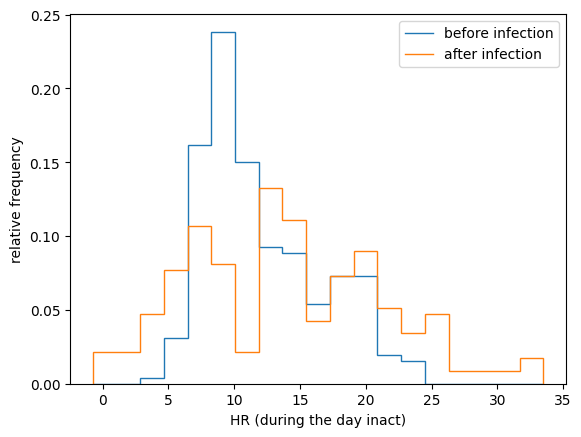

In [529]:
bins = np.linspace(min(np.array(dayr_mean)[np.array(dayr_mean) != 0])-0.1, max(np.array(dayr_mean)[np.array(dayr_mean) != 0]), 20)
dayr_mean = np.array(dayr_mean)

dm_bt = dayr_mean[:np.where(dd.index == df['dt'].iloc[0])[0][0]]
dm_bt = dm_bt[dm_bt != 0]
dm_at = dayr_mean[np.where(dd.index == df['dt'].iloc[0])[0][0]:]
dm_at = dm_at[dm_at != 0]
n_dbt,_ = np.histogram(dm_bt, bins = bins)
n_dat,_ = np.histogram(dm_at, bins = bins )
plt.stairs(n_dbt/len(dm_bt), bins, fill=False)
plt.stairs(n_dat/len(dm_at), bins, fill=False)
plt.legend(['before infection','after infection'])
plt.xlabel('HR (during the day inact)');
plt.ylabel('relative frequency');

In [530]:
bins = np.linspace(min(np.array(day_mean)[np.array(day_mean) != 0])-0.1, max(np.array(day_mean)[np.array(day_mean) != 0]), 20)

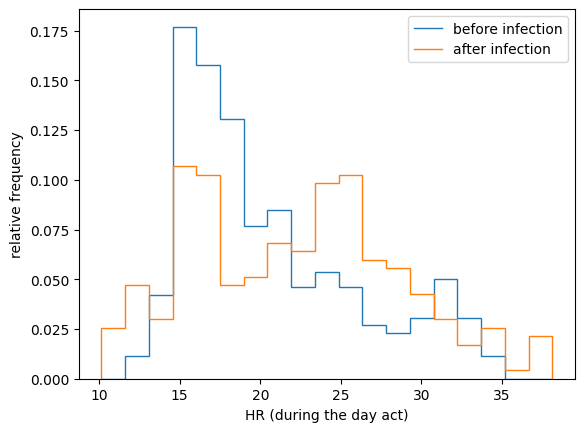

In [531]:
day_mean = np.array(day_mean)

dm_bt = day_mean[:np.where(dd.index == df['dt'].iloc[0])[0][0]]
dm_bt = dm_bt[dm_bt != 0]
dm_at = day_mean[np.where(dd.index == df['dt'].iloc[0])[0][0]:]
dm_at = dm_at[dm_at != 0]
n_dbt,_ = np.histogram(dm_bt, bins = bins)
n_dat,_ = np.histogram(dm_at, bins = bins )
plt.stairs(n_dbt/len(dm_bt), bins, fill=False)
plt.stairs(n_dat/len(dm_at), bins, fill=False)
plt.legend(['before infection','after infection'])
plt.xlabel('HR (during the day act)');
plt.ylabel('relative frequency');

In [532]:
night_mean = np.array(night_mean)

In [533]:
bins = np.linspace(night_mean[night_mean != 0].min()-0.1, night_mean[night_mean != 0].max(), 20)

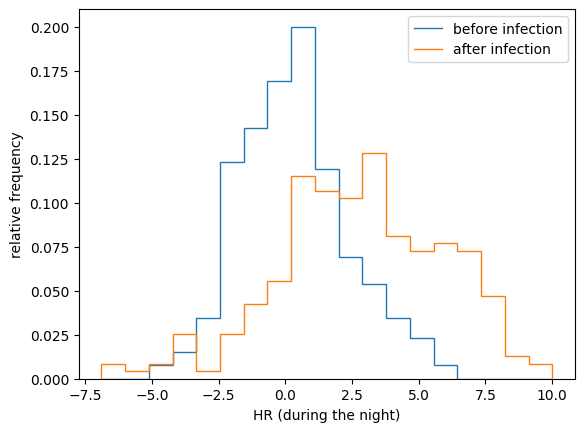

In [534]:
night_mean = np.array(night_mean)
nm_bt = night_mean[:np.where(dd.index == df['dt'].iloc[0])[0][0]]
nm_bt = nm_bt[nm_bt != 0]
nm_at = night_mean[np.where(dd.index == df['dt'].iloc[0])[0][0]:]
nm_at = nm_at[nm_at != 0]
n_nbt, _ = np.histogram(nm_bt, bins = bins)
n_nat, _ = np.histogram(nm_at, bins = bins )
plt.stairs(n_nbt/len(nm_bt), bins, fill=False)
plt.stairs(n_nat/len(nm_at), bins, fill=False)
plt.legend(['before infection','after infection'])
plt.xlabel('HR (during the night)');
plt.ylabel('relative frequency');

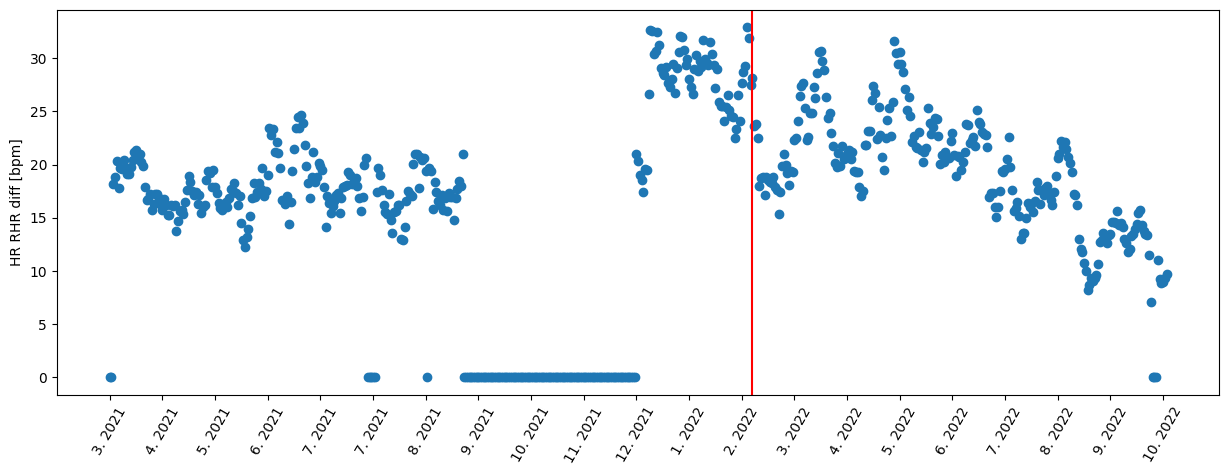

In [535]:
plt.figure(figsize=(15,5))
#plt.scatter(range(len(day_mean)),day_mean,s= 15)
#plt.scatter(range(len(night_mean)),night_mean, s= 15) 
plt.scatter(range(len(day_mean)), day_mean-np.array(night_mean))
plt.axvline(x=np.where(dd.index == df['dt'].iloc[0])[0] ,color='r')
#plt.errorbar(range(len(day_mean)),day_mean,yerr=day_std, fmt="o")
#plt.errorbar(range(len(night_mean)),night_mean,yerr=night_std, fmt="o")
plt.xticks(range(len(day_mean))[::30],labels = [str(pd.to_datetime(w[0]).month)+'. '+str(pd.to_datetime(w[0]).year) for w in wi_list][::30],rotation=60);
#plt.ylim(60,85);
#plt.xlim(390,910)
plt.ylabel('HR RHR diff [bpm]');

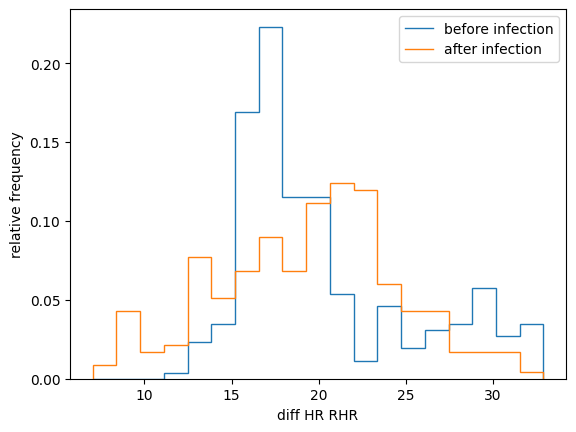

In [536]:
meandiff = day_mean-night_mean
bins = np.linspace(meandiff[meandiff != 0].min()-0.1, meandiff[meandiff != 0].max(), 20)
md_bt = meandiff[:np.where(dd.index == df['dt'].iloc[0])[0][0]]
md_bt = md_bt[md_bt != 0] 
md_at = meandiff[np.where(dd.index == df['dt'].iloc[0])[0][0]:]
md_at = md_at[md_at != 0]  
n_dbt, _ = np.histogram(md_bt, bins = bins)
n_dat, _ = np.histogram(md_at, bins = bins )
plt.stairs(n_dbt/len(md_bt), bins, fill=False)
plt.stairs(n_dat/len(md_at), bins, fill=False)
plt.legend(['before infection','after infection'])
plt.xlabel('diff HR RHR');
plt.ylabel('relative frequency');

## with symtpoms

In [537]:
# get age
def get_symptoms(user_ids):
    
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids) 
    
    query = f"""
    select
        a.id,
        a.user_id, 
        a.element,
        a.created_at
    from 
        rocs.datenspende.answers a
    where 
        a.user_id IN {formatter}  and (a.question = 137 or a.question = 8 )

    """

    df_all = query_pg_df(query)
    df_all['dt'] = pd.to_datetime(df_all['created_at'],unit='ms')
    df_all['dt'] = df_all['dt'].dt.date
    df_all = df_all[df_all['dt'] >= pd.to_datetime('2021-10-25')]
    df_all = df_all[['user_id', 'element', 'dt']]
     
    df_868 = df_all[(df_all.element == 868)|(df_all.element == 49)].copy()
    df_868.loc[:,'element'] = [True] * len(df_868)
    df_868 = df_868.rename({'element':868}, axis=1)
    df_867 = df_all[df_all.element == 867].copy()
    df_867.loc[:,'element'] = True
    df_867 = df_867.rename({'element':867}, axis=1)
    df_866 = df_all[df_all.element == 866].copy()
    df_866.loc[:,'element'] = True
    df_866 = df_866.rename({'element':866}, axis=1)
    df_865 = df_all[(df_all.element == 865)|(df_all.element == 48)].copy()
    df_865.loc[:,'element'] = True
    df_865 = df_865.rename({'element':865}, axis=1)
    df_864 = df_all[(df_all.element == 864)|(df_all.element == 47)].copy()
    df_864.loc[:,'element'] = True
    df_864 = df_864.rename({'element':864}, axis=1)
    df_863 = df_all[(df_all.element == 863)|(df_all.element == 46)].copy()
    df_863.loc[:,'element'] = True
    df_863 = df_863.rename({'element':863}, axis=1)
    df_862 = df_all[(df_all.element == 862)|(df_all.element == 45)].copy()
    df_862.loc[:,'element'] = True
    df_862 = df_862.rename({'element':862}, axis=1)
    df_861 = df_all[(df_all.element == 861)|(df_all.element == 44)].copy()
    df_861.loc[:,'element'] = True
    df_861 = df_861.rename({'element':861}, axis=1)
    df_860 = df_all[(df_all.element == 860)|(df_all.element == 43)].copy()
    df_860.loc[:,'element'] = True
    df_860 = df_860.rename({'element':860}, axis=1)
    df_859 = df_all[(df_all.element == 859)|(df_all.element == 42)].copy()
    df_859.loc[:,'element'] = True
    df_859 = df_859.rename({'element':859}, axis=1)
    df_858 = df_all[(df_all.element == 858)|(df_all.element == 41)].copy()
    df_858.loc[:,'element'] = True
    df_858 = df_858.rename({'element':858}, axis=1)
    df_857 = df_all[(df_all.element == 857)|(df_all.element == 40)].copy()
    df_857.loc[:,'element'] = True
    df_857 = df_857.rename({'element':857}, axis=1)
    
    dfs = [df_868, df_867, df_866, df_865, df_864, df_863, df_862, df_861, df_860, df_859, df_858, df_857]
    
    
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','dt'],
                                            how='outer'), dfs).fillna(False)
    df_merged['upd'] = 1
    
    
    return df_merged

In [538]:
dfm = get_symptoms(userid)

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [539]:
df['date'] = pd.to_datetime(df['date'])

In [540]:
dfm.rename(columns={'dt':'date'}, inplace=True)
dfm['date'] = pd.to_datetime(dfm['date'])
df_ws = pd.merge(df, dfm, how='outer', on = 'date')

In [541]:
el = [ 867, 866, 865, 864, 863, 862, 861, 860, 859, 858, 857]
eln = ['shortness of breath', 'fever', 'headache', 'sore throat','diarrhea', 'runny nose', 'cough', 'fatigue','loss of smell/taste', 'limb ache', 'chills']

In [542]:
from matplotlib.lines import Line2D

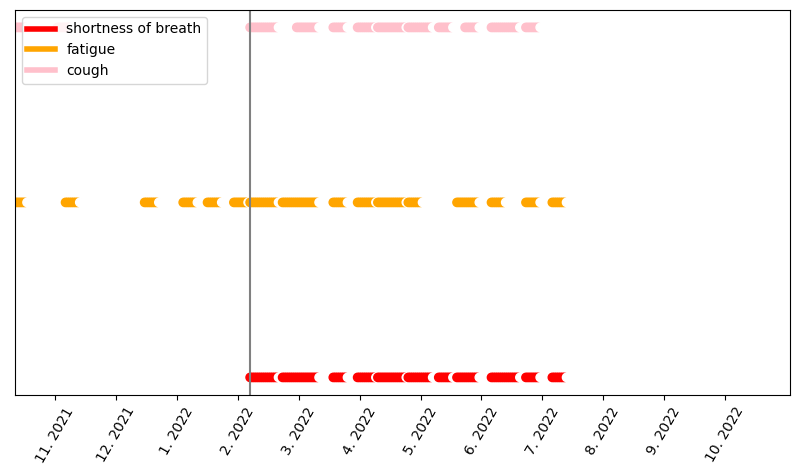

In [543]:
plt.figure(figsize=(10,5))
#plt.scatter(range(len(day_mean)),day_mean,s= 15)
#plt.scatter(range(len(night_mean)),night_mean, s= 15) 
#plt.scatter(range(len(day_mean)), day_mean-np.array(night_mean), c='k',alpha=0.5)
#plt.scatter(range(len(rhr_mean)), rhr_mean, c='k',alpha=0.5)

#plt.errorbar(range(len(day_mean)),day_mean,yerr=day_std, fmt="o")
#plt.errorbar(range(len(night_mean)),night_mean,yerr=night_std, fmt="o")
plt.xticks(range(len(day_mean))[::30],labels = [str(pd.to_datetime(w[0]).month)+'. '+str(pd.to_datetime(w[0]).year) for w in wi_list][::30],rotation=60);
#plt.ylim(-4,90);
symp_bool = [np.any(df_ws[df_ws['date'].isin(wi_list[w])][867]) for w in range(len(wi_list))]
symp_col = ['red' if s else 'white' for s in symp_bool]
plt.scatter(range(len(day_mean)), [0]*len(day_mean), c=symp_col)
#plt.text(660, -1, 'shortness of breath',c='r' )
symp_bool = [np.any(df_ws[df_ws['date'].isin(wi_list[w])][860]) for w in range(len(wi_list))]
symp_col = ['orange' if s else 'white' for s in symp_bool]
plt.scatter(range(len(day_mean)), [.5]*len(day_mean), c=symp_col)
#plt.text(660, -2, 'fatigue',c='orange' )
symp_bool = [np.any(df_ws[df_ws['date'].isin(wi_list[w])][861]) for w in range(len(wi_list))]
symp_col = ['pink' if s else 'white' for s in symp_bool]
plt.scatter(range(len(day_mean)), [1]*len(day_mean), c=symp_col)
#plt.text(660, -3, 'cough',c='pink' )
#plt.ylim(-6,100)
plt.xlim(250)
plt.axvline(x=np.where(dd.index == df['dt'].iloc[0])[0] ,color='grey')
plt.yticks([], [])
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='pink', lw=4)]
plt.legend(custom_lines,['shortness of breath', 'fatigue', 'cough'],loc='upper left');
#plt.ylabel('RHR [bpm]');

## high activty 

In [544]:
df['dt'] = pd.to_datetime(df['dt'])

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
# group by day and hourly - sum up steps and take mean of heart rate
# per day 24 time bins with steps summed up and mean of heart rate

#for du in range(len(df_lcu[0])): 
d = df.copy()
d['steps'] = d['steps'].fillna(0)
d['steps'] = d['steps'] + 1

df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')


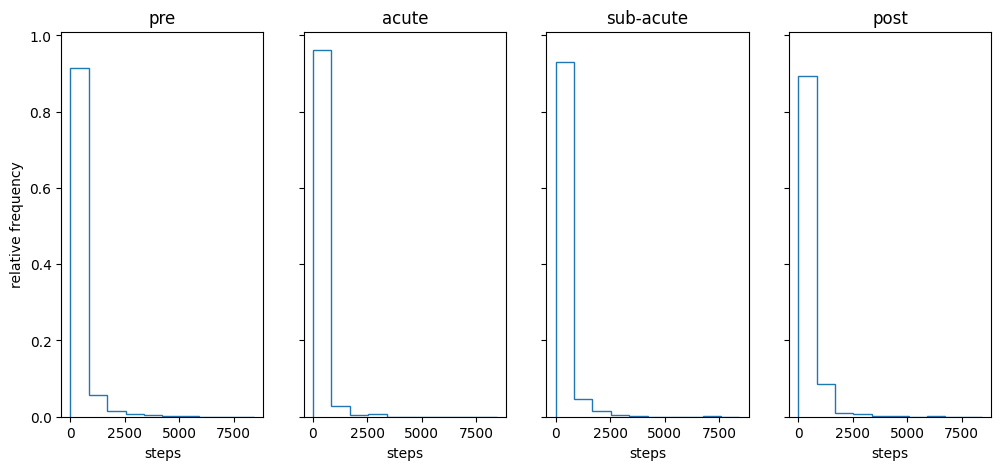

In [545]:
fig, ax = plt.subplots(1,4, figsize=(12,5), sharey=True, sharex = True)
phases = ['pre', 'acute', 'sub-acute', 'post']
for ph in [0,1,2,3]:
  
    dfph = d_agg[d_agg['phase'] == ph]
    
    if ph == 0:
        n_a,bins = np.histogram(dfph[dfph['steps'] >4]['steps'])
    else: 
        n_a, _ = np.histogram(dfph[dfph['steps'] >4]['steps'], bins = bins)
    ax[ph].stairs(n_a/len(dfph[dfph['steps'] >4]['steps']), bins, fill=False)
 
    ax[ph].set_title(phases[ph])
    ax[ph].set_xlabel('steps');
ax[0].set_ylabel('relative frequency');

In [546]:
nsp = []
for w in d_agg['week_totest'].unique():
    d = d_agg[d_agg['week_totest']==w]
    nsp.append(len(d[(d['hr'] > 80)&(d['steps'] > 2000)]))

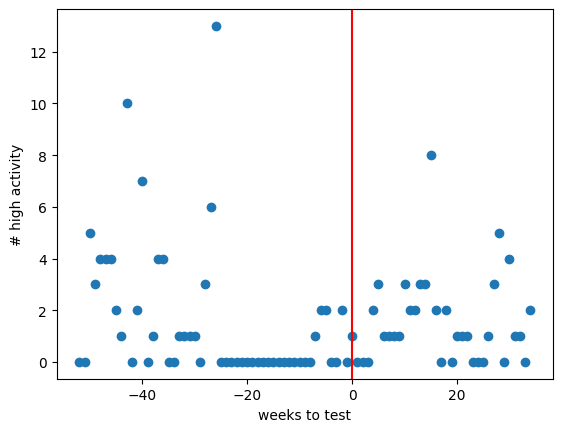

In [547]:
plt.scatter(d_agg['week_totest'].unique(), nsp)
plt.axvline(x=0 ,color='r')
plt.xlabel('weeks to test')
plt.ylabel('# high activity');

## phase plot

In [548]:
# fig, ax = plt.subplots(1,4,figsize=(14,5),sharex = True, sharey = True)
# for ph in [0,1,2,3]:
#     dph = d_agg[d_agg['phase'] == ph]
#     for dat in  dph['date'].unique():
#         ax[ph].plot(dph[dph['date'] == dat]['steps'],dph[dph['date'] == dat]['hr'])
#         x = dph[dph['date'] == dat]['steps'] -4
#         y = dph[dph['date'] == dat]['hr']
#         x= x.values
#         y = y.values
#         ax[ph].quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],scale_units='xy',  angles='xy', scale=4,width=0.004)
#         ax[ph].set_title(phases[ph])
#         ax[ph].set_xlabel('steps')
#         ax[ph].set_ylabel('hr');

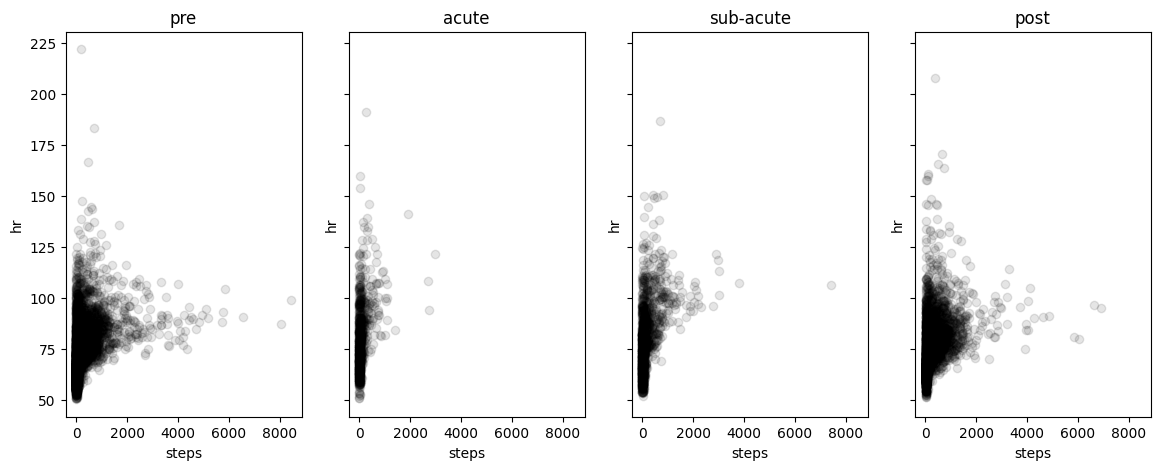

In [549]:
phases = ['pre', 'acute', 'sub-acute', 'post']
fig, ax = plt.subplots(1,4,figsize=(14,5),sharex = True, sharey = True)
for ph in [0,1,2,3]:
    dph = d_agg[d_agg['phase'] == ph]
    for dat in  dph['date'].unique():
        ax[ph].scatter(dph[dph['date'] == dat]['steps'],dph[dph['date'] == dat]['hr'],c='k',alpha=0.1)
        #x = dph[dph['date'] == dat]['steps'] -4
        #y = dph[dph['date'] == dat]['hr']
        #x= x.values
        #y = y.values
        #ax[ph].quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],scale_units='xy',  angles='xy', scale=4,width=0.004)
    ax[ph].set_title(phases[ph])
    ax[ph].set_xlabel('steps')
    ax[ph].set_ylabel('hr');

In [550]:
len(df[df['phase'] == 3].date.unique())

152

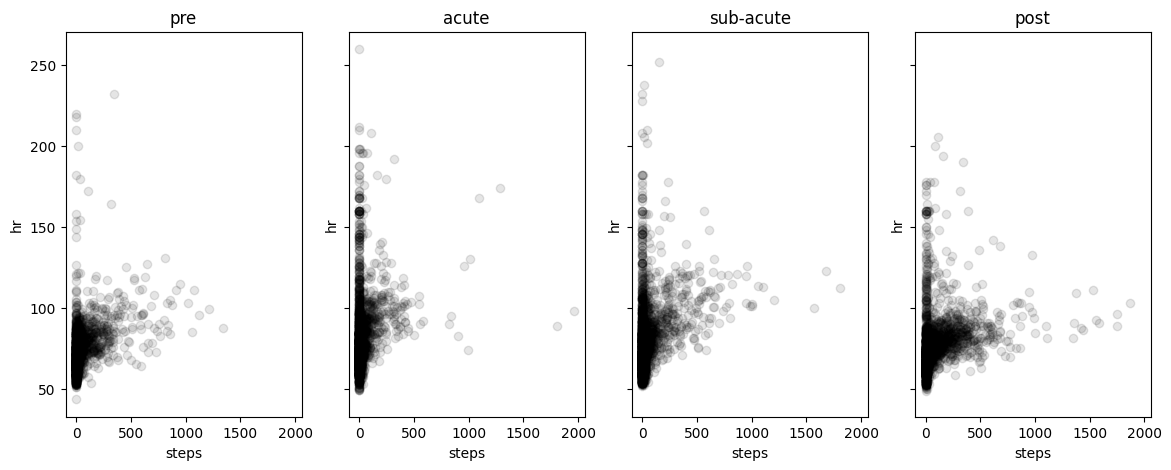

In [551]:
np.random.seed(2)
phases = ['pre', 'acute', 'sub-acute', 'post']
fig, ax = plt.subplots(1,4,figsize=(14,5),sharex = True, sharey = True)
sel_days = len(df[df['phase'] == 1].date.unique())
for ph in [0,1,2,3]:
    dph = df[df['phase'] == ph]
    for dat in  np.random.choice(dph.date.unique(),sel_days,replace=False):
        ax[ph].scatter(dph[dph['date'] == dat]['steps'],dph[dph['date'] == dat]['hr'],c='k',alpha=0.1)
        #x = dph[dph['date'] == dat]['steps'] -4
        #y = dph[dph['date'] == dat]['hr']
        #x= x.values
        #y = y.values
        #ax[ph].quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1],scale_units='xy',  angles='xy', scale=4,width=0.004)
    ax[ph].set_title(phases[ph])
    ax[ph].set_xlabel('steps')
    ax[ph].set_ylabel('hr');

In [552]:
df = df.sort_values('date')
df.start = pd.to_datetime(df.start)
d = df.copy()
# take out days where there is no step entry at all 
d_idx = df.groupby('date').sum()[df.groupby('date').sum()['steps'] == 0].index
df['clean'] = df['date'].apply(lambda x: 1 if x in d_idx else 0)
df = df[df['clean'] == 0]
df = df.drop('clean',axis=1)
#
d['steps'] = d['steps'].fillna(0)
d['steps'] = d['steps'] + 1

df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')

In [553]:
phases = ['Pre-', 'Acute-', 'Sub-acute-', 'Post-Phase']

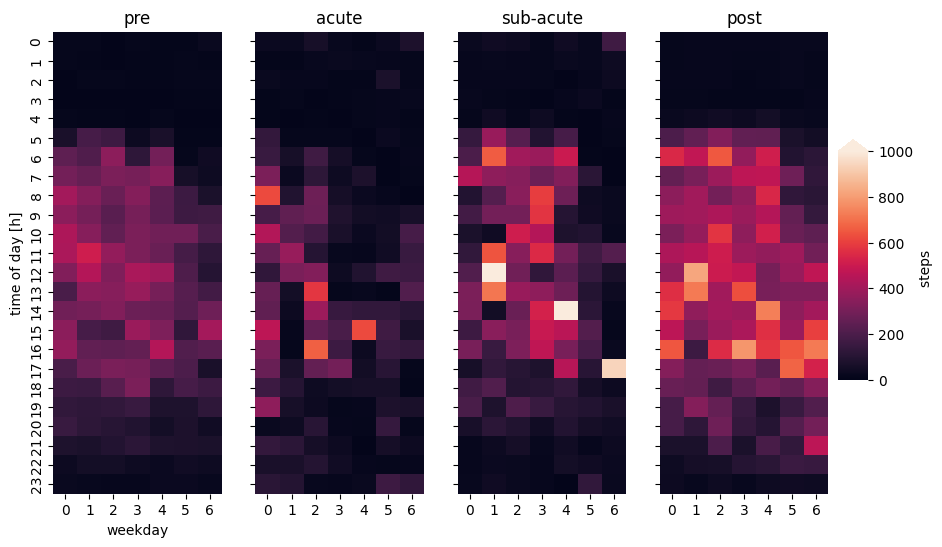

In [554]:
#d_agg['steps'] -= 4
xhd = np.zeros((24, 7,4))
for ph in range(4):
    dph = d_agg[d_agg['phase'] == ph]
    if len(dph) > 0:
        dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()

        for wd in range(7):
            if len(dpg[dpg.day_of_week == wd]) == 24:
                xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['steps'].values

xhd[xhd == 0] = np.nan
phases = ['pre', 'acute', 'sub-acute', 'post'] 
fig, axn = plt.subplots(1, 4,figsize=(10,6), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

norm = d_agg[d_agg['phase'] == 0]['steps'].mean()

for i, ax in enumerate(axn.flat): 
    sns.heatmap((xhd[:,:,i]), ax=ax, #cmap='vlag',
                cbar=i == 0,
                vmin = 0, vmax = 1000,
                #vmin=-1, vmax=np.nanmax(xhd-norm)/norm,
                cbar_ax=None if i else cbar_ax,cbar_kws={'label': 'steps ','extend':'max',} )
    
    axn[i].set_title(phases[i])

#fig.tight_layout(rect=[0, 0, .9, 1])
axn[0].set_ylabel('time of day [h]')
axn[0].set_xlabel('weekday');
# w_pre = (xhd[:,:,0]/norm)/sum(sum(xhd[:,:,0]/norm))
# ypis = []
# for i in range(4):
#     y_pi = sum(sum(w_pre * ((xhd[:,:,i]/norm) - (xhd[:,:,0]/norm) )))
#     ypis.append(y_pi)

In [555]:
dph = d_agg[(d_agg['phase'] == 1)]
xhd = np.zeros((24,len(dph.day_totest.unique())))
for d in range(len(dph.day_totest.unique())):
    xhd[:, d] = dph[(d_agg['day_totest'] == dph.day_totest.unique()[d] )]['steps'].values

/tmp/ipykernel_102035/4160961442.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xhd[:, d] = dph[(d_agg['day_totest'] == dph.day_totest.unique()[d] )]['steps'].values


<AxesSubplot: >

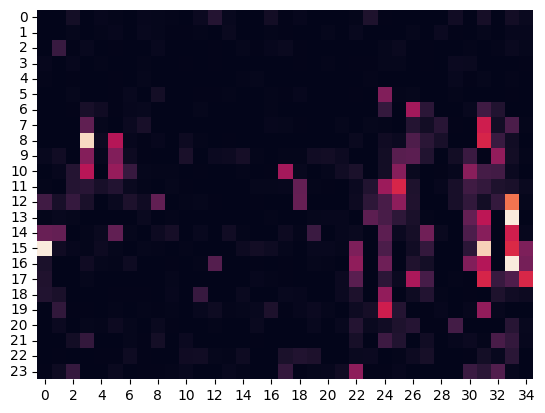

In [556]:
sns.heatmap((xhd ),   #cmap='vlag',
                cbar=i ,
                vmin = 0, vmax = 2000,
                #vmin=-1, vmax=np.nanmax(xhd-norm)/norm,
                cbar_ax= cbar_ax,cbar_kws={'label': 'steps ','extend':'max',} )

In [557]:
phases = ['Pre-', 'Acute-', 'Sub-acute-', 'Post-Phase']

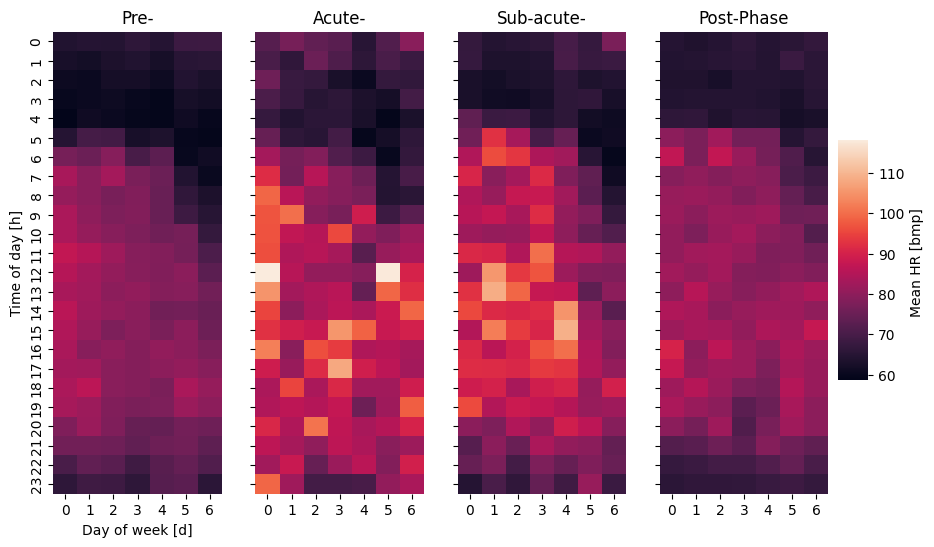

In [558]:
xhd = np.zeros((24, 7,4))
for ph in range(4):
    dph = d_agg[d_agg['phase'] == ph]
    dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()
    
    for wd in range(7):
        if len(dpg[dpg.day_of_week == wd]) >= 24:
            xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['hr'].values
fig, axn = plt.subplots(1, 4,figsize=(10,6), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

norm = d_agg[d_agg['phase'] == 0]['hr'].mean()
xhd[xhd == 0] = np.nan
for i, ax in enumerate(axn.flat):
    sns.heatmap(xhd[:,:,i], ax=ax,
                cbar=i == 0,
                vmin=np.nanmin(xhd), vmax=np.nanmax(xhd),
                #vmin = np.nanmin(xhd), vmax = np.nanmax(xhd),
                cbar_ax=None if i else cbar_ax,cbar_kws={'label': 'Mean HR [bmp] '})
    axn[i].set_title(phases[i])

#fig.tight_layout(rect=[0, 0, .9, 1])
axn[0].set_ylabel('Time of day [h]')
axn[0].set_xlabel('Day of week [d]');

In [ ]:
 
    dph = d_agg[d_agg['phase'] == 0]
    g = sns.PairGrid( dph[['hr','steps']])
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)
    #g.map_diag(sns.scatterplot)

In [ ]:
 
    dph = d_agg[d_agg['phase'] == 1]
    g = sns.PairGrid( dph[['hr','steps']])
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

In [ ]:
 
    dph = d_agg[d_agg['phase'] == 2]
    g = sns.PairGrid( dph[['hr','steps']])
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

In [ ]:
 
    dph = d_agg[d_agg['phase'] == 3]
    g = sns.PairGrid( dph[['hr','steps']])
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(14,14))
ax_list = []
for ph in [0,1,2,3]:
    dph = d_agg[d_agg['phase'] == ph] 
    ax = fig.add_subplot(2, 2, ph+1, projection='3d')
    # Data for a three-dimensional line
    for dat in  dph['date'].unique():
        xline = dph[dph['date'] == dat]['steps'] - 4
        xline = xline.values
        yline = [dph[(dph['date'] == dat)].sum().sleep] * len(xline) 
        zline = dph[dph['date'] == dat]['hr']
        zline = zline.values
        ax.plot3D(xline, yline, zline);
    ax.set_xlabel('steps')
    ax.set_ylabel('sleep')
    ax.set_zlabel('hr');
    ax.set_title(phases[ph])



## HROS

In [ ]:
d_agg['hros'] = d_agg['hr']/d_agg['steps']

In [ ]:
plt.figure(figsize=(10,5))
for ph in [0,1,2,3]:
    dph = d_agg[d_agg['phase']==ph]
    plt.plot(dph.groupby([dph.start.dt.hour]).mean()['hros'])
plt.legend(phases);
plt.ylabel('HROS')
plt.xlabel('time [h]')